In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from textwrap import wrap

In [2]:
titlefont = {'color':  'dimgrey',
        'weight': 'bold',
        'size': 20}
font1 = {'color':  'darkgray',
        'weight': 'bold',
        'size': 15}
font2 = {'color':  'grey',
        'weight': 'bold',
        'size': 15}
highlight = {'color': '#e78ac3',
        'weight': 'bold',
        'size': 15}

pos_labels = ['Very positive', 'Positive', 'Neutral', 'Negative', 'Very negative']
agr_labels = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
regulationlabels=['Unregulated','Slightly regulated', 'Moderately regulated','Quite regulated','Heavily regulated']

In [3]:
df = pd.read_excel('./poAI.xlsx', usecols=[1,2,3,*range(7,24)])

df.columns = ['Age', 'Gender', 'Ethnicity','Previous AI knowledge','Represents AI','Advancement view','Influenced view','Comfortable with AI','Comfortable type AI','Surpass human intellect','Regulation',
             'Replace job','Trust tech ethical','Tech safe','Tech privacy','Privacy','Moral','AI discriminate','AI trustworthy news','Positive impact outweighs negative']

df = df.astype('category')
df['Influenced view']= df['Influenced view'].astype(pd.CategoricalDtype(categories=['Science Fiction (movies, books, comics, tv shows)','Social media', 'News websites like BBC, Sky, CNET', 'Tech websites like TechCrunch, TheNextWeb, Gizmodo','Scientific reports','Other'],ordered=True))
df.head(5)

,Age,Gender,Ethnicity,Previous AI knowledge,Represents AI,Advancement view,Influenced view,Comfortable with AI,Comfortable type AI,Surpass human intellect,Regulation,Replace job,Trust tech ethical,Tech safe,Tech privacy,Privacy,Moral,AI discriminate,AI trustworthy news,Positive impact outweighs negative
0,19-24,Female,Arab,Yes,Humanoid robots,2,"Science Fiction (movies, books, comics, tv shows)",Maybe,Both,No,4,I do not work,2,2,4,4,5,4,2,4
1,19-24,Female,White,Yes,Humanoid robots,4,"Science Fiction (movies, books, comics, tv shows)",No,Non humanoid robots,Maybe,5,Yes,4,4,5,5,5,3,3,4
2,19-24,Female,Black,No,Humanoid robots,4,"Science Fiction (movies, books, comics, tv shows)",Maybe,Non humanoid robots,Maybe,5,No,5,4,5,5,5,5,5,5
3,19-24,Female,White,Yes,"Apps like Uber, Google maps, Social media apps...",2,Scientific reports,Maybe,Non humanoid robots,Yes,4,I do not work,4,3,3,2,4,4,3,3
4,19-24,Female,Black,No,"Apps like Uber, Google maps, Social media apps...",3,"News websites like BBC, Sky, CNET",No,Humanoid robots,Maybe,5,Yes,3,3,3,3,4,3,3,3


In [4]:
describe = df.describe()
describe


,Age,Gender,Ethnicity,Previous AI knowledge,Represents AI,Advancement view,Influenced view,Comfortable with AI,Comfortable type AI,Surpass human intellect,Regulation,Replace job,Trust tech ethical,Tech safe,Tech privacy,Privacy,Moral,AI discriminate,AI trustworthy news,Positive impact outweighs negative
count,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,5,3,6,2,5,5,6,3,4,3,5,3,5,5,5,5,5,5,5,5
top,19-24,Female,White,Yes,"Virtual assistants like Alexa, Google Home",2,"Science Fiction (movies, books, comics, tv shows)",Maybe,Non humanoid robots,Yes,5,No,4,2,5,5,4,4,3,3
freq,67,65,51,67,39,38,29,41,42,51,45,43,38,36,44,37,47,35,45,40


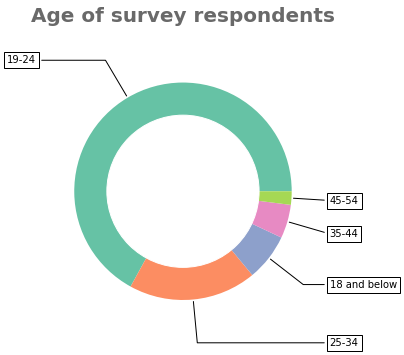

In [5]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

age = df['Age'].value_counts()
agelabels = ['19-24','25-34','18 and below','35-44','45-54']

colors5 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']

wedges, texts = ax.pie(age , colors=colors5, wedgeprops=dict(width=0.5))

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)



bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(agelabels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.title('Age of survey respondents', y = 1.1,fontdict=titlefont)
#plt.savefig('age.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

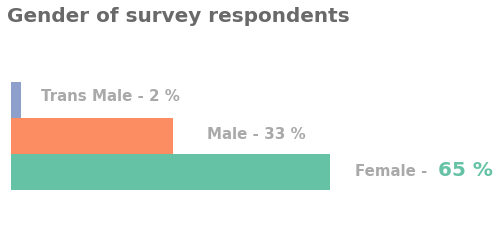

In [6]:
fig = plt.figure(figsize=(8,6))

colors3 = ['#66c2a5','#fc8d62','#8da0cb']

ax= df['Gender'].value_counts().to_frame().T.plot.barh(color=colors3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.5,0.8))

ax.text(6,0.165,'Trans Male - 2 %', fontdict=font1) 
ax.text(40,-0.01,'Male - 33 %', fontdict=font1)

ax.text(70,-0.18,'Female -', fontdict=font1)
ax.text(87,-0.18,'65 %', fontdict=titlefont, color='#66c2a5')

ax.get_legend().remove()

ax.set_title('Gender of survey respondents', fontdict=titlefont)
#plt.savefig('gender.png', dpi=300, bbox_inches='tight')
plt.show()


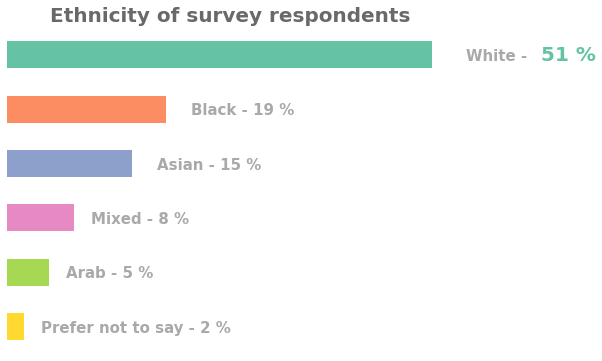

In [7]:
fig = plt.figure(figsize=(8,6))

colors6 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

ax = df['Ethnicity'].value_counts().plot.barh(color=colors6)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.text(55,0.1,'White -', fontdict=font1)
ax.text(64,0.1,'51 %', fontdict=titlefont, color='#66c2a5')

ax.text(22,1.1,'Black - 19 %', fontdict=font1)
ax.text(18,2.1,'Asian - 15 %', fontdict=font1)
ax.text(10,3.1,'Mixed - 8 %', fontdict=font1)
ax.text(7,4.1,'Arab - 5 %', fontdict=font1)
ax.text(4,5.1,'Prefer not to say - 2 %', fontdict=font1)


ax.set_title('Ethnicity of survey respondents', fontdict=titlefont)
#plt.savefig('ethnicity.png', dpi=300, bbox_inches='tight')
plt.show()

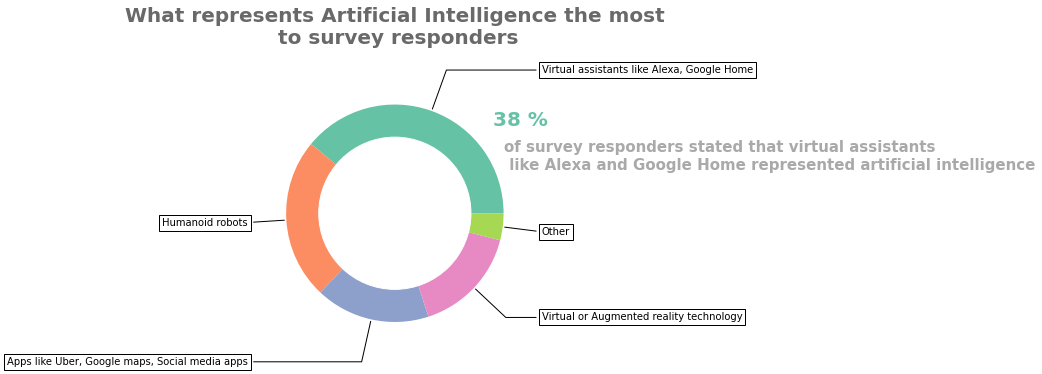

In [8]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

represent = df['Represents AI'].value_counts()
representlabels =  ['Virtual assistants like Alexa, Google Home','Humanoid robots','Apps like Uber, Google maps, Social media apps','Virtual or Augmented reality technology','Other']

colors5 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']

wedges, texts = ax.pie(represent , colors=colors5, wedgeprops=dict(width=0.5))

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)



bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(representlabels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.text(0.9,0.8,'38 %', fontdict=titlefont, color='#66c2a5')
ax.text(1,0.4,'of survey responders stated that virtual assistants\n like Alexa and Google Home represented artificial intelligence', fontdict=font1)

plt.title('What represents Artificial Intelligence the most\n to survey responders', y = 1.1,fontdict=titlefont)
#plt.savefig('represent.png', dpi=300, bbox_inches='tight')
plt.show()

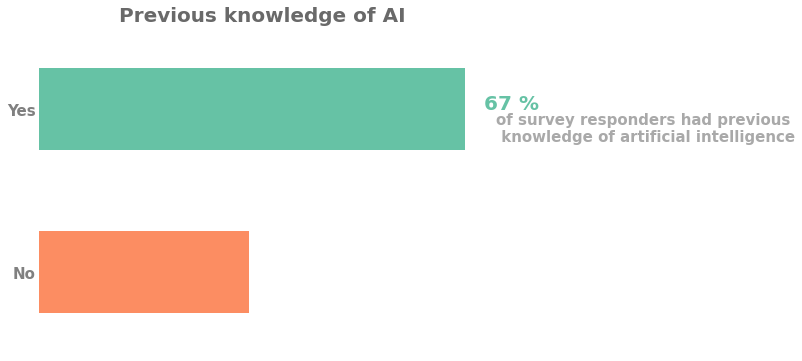

In [9]:
fig = plt.figure(figsize=(8,6))

colors2 = ['#66c2a5','#fc8d62']
yesno = ['Yes','No']
ax = df['Previous AI knowledge'].value_counts().plot.barh(color=colors2)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

ax.text(70,0,'67 %', fontdict=titlefont, color='#66c2a5')
ax.text(72,0.2,'of survey responders had previous\n knowledge of artificial intelligence', fontdict=font1)


ax.set_title('Previous knowledge of AI', fontdict=titlefont)
ax.set_yticklabels(yesno,fontdict=font2)
#plt.savefig('prevknowALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 720x576 with 0 Axes>

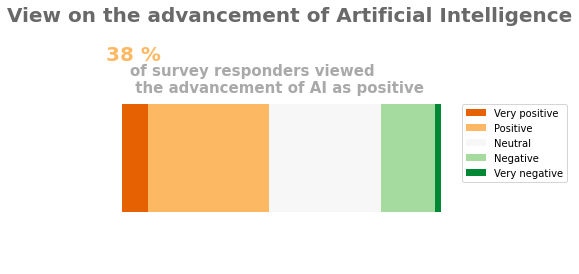

In [10]:
# What is your view on the advancement of artificial intelligence technology?

fig = plt.figure(figsize=(10,8))

dcolors = ['#e66101','#fdb863','#f7f7f7','#a6dba0','#008837']
ad = df['Advancement view'].value_counts().sort_index()
ax = ad.to_frame().T.plot.barh(stacked=True, color=dcolors)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, pos_labels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'38 %', fontdict=titlefont, color='#fdb863')
ax.text(2.5,0.3,'\nof survey responders viewed\n the advancement of AI as positive', fontdict=font1)

ax.set_yticklabels('')
ax.set_title('View on the advancement of Artificial Intelligence', y=1.1,fontdict=titlefont)
#plt.savefig('advancementALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

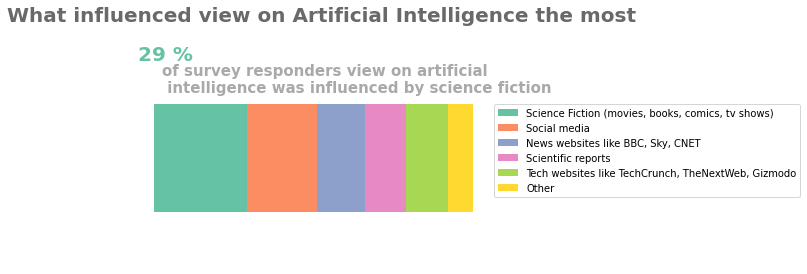

In [11]:
# "What influenced your view on artificial intelligence the most?":"Influenced view"
fig = plt.figure(figsize=(8,6))

inf = df['Influenced view'].value_counts()
ax = inf.to_frame().T.plot.barh(stacked=True, color=colors6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

#handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'29 %', fontdict=titlefont, color='#66c2a5')
ax.text(2.5,0.3,'\nof survey responders view on artificial\n intelligence was influenced by science fiction ', fontdict=font1)


ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('What influenced view on Artificial Intelligence the most',y=1.1,fontdict=titlefont)
#plt.savefig('influenceALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

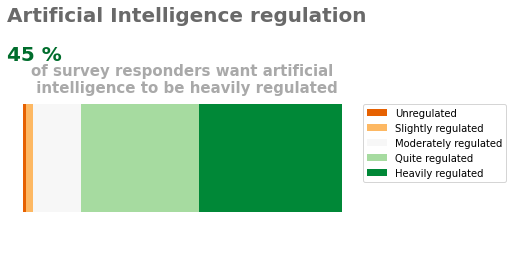

In [12]:
# "Should advancing artificial intelligence technology be regulated?":"Regulation"

fig = plt.figure(figsize=(8,6))

regu = df['Regulation'].value_counts().sort_index()
ax = regu.to_frame().T.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, regulationlabels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'45 %', fontdict=titlefont, color='#006d2c')
ax.text(2.5,0.3,'\nof survey responders want artificial\n intelligence to be heavily regulated ', fontdict=font1)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('Artificial Intelligence regulation ',y=1.1,fontdict=titlefont)
#plt.savefig('regulationALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

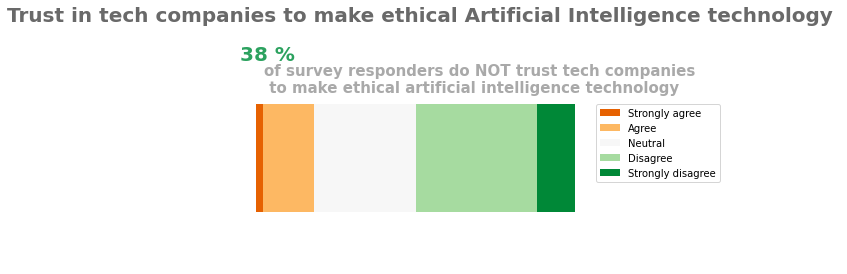

In [13]:
# "Tech companies can be trusted to make ethical artificial intelligence technology":"Trust tech ethical"

fig = plt.figure(figsize=(8,6))

trustE = df['Trust tech ethical'].value_counts().sort_index()
ax = trustE.to_frame().T.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'38 %', fontdict=titlefont, color='#2ca25f')
ax.text(2.5,0.3,'\nof survey responders do NOT trust tech companies\n to make ethical artificial intelligence technology', fontdict=font1)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('Trust in tech companies to make ethical Artificial Intelligence technology ',y=1.1,fontdict=titlefont)
#plt.savefig('ethicalALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

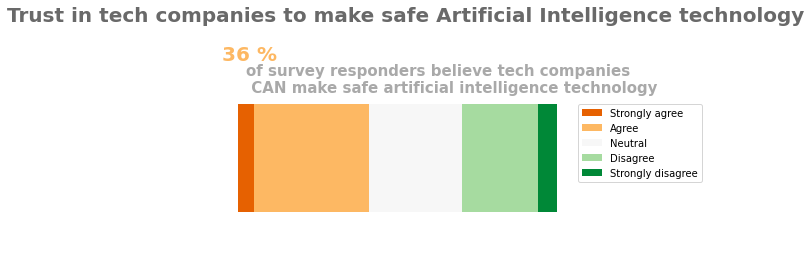

In [14]:
# "Tech companies are competent in creating safe artificial intelligence technology for the public":"Tech safe"

fig = plt.figure(figsize=(8,6))

trustS = df['Tech safe'].value_counts().sort_index()
ax = trustS.to_frame().T.plot.barh(stacked=True, color=dcolors)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'36 %', fontdict=titlefont, color='#fdb863')
ax.text(2.5,0.3,'\nof survey responders believe tech companies\n CAN make safe artificial intelligence technology ', fontdict=font1)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('Trust in tech companies to make safe Artificial Intelligence technology',y=1.1,fontdict=titlefont)
#plt.savefig('safeALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

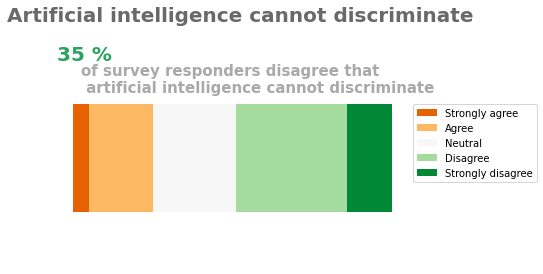

In [15]:
fig = plt.figure(figsize=(8,6))

moral = df['AI discriminate'].value_counts().sort_index()
ax = moral.to_frame().T.plot.barh(stacked=True, color=dcolors)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'35 %', fontdict=titlefont, color='#2ca25f')
ax.text(2.5,0.3,'\nof survey responders disagree that\n artificial intelligence cannot discriminate ', fontdict=font1)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('Artificial intelligence cannot discriminate',y=1.1,fontdict=titlefont)
#plt.savefig('discALL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

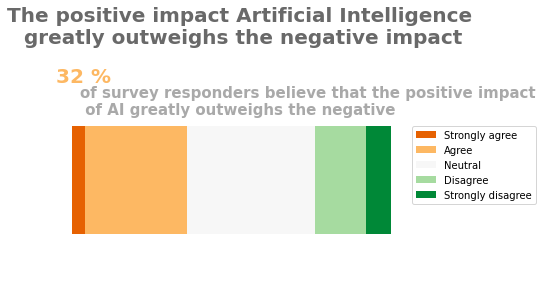

In [16]:
fig = plt.figure(figsize=(8,6))

moral = df['Positive impact outweighs negative'].value_counts().sort_index()
ax = moral.to_frame().T.plot.barh(stacked=True, color=dcolors)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,0.77))

ax.text(-5,0.45,'32 %', fontdict=titlefont, color='#fdb863')
ax.text(2.5,0.3,'\nof survey responders believe that the positive impact\n of AI greatly outweighs the negative', fontdict=font1)

ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('The positive impact Artificial Intelligence\n greatly outweighs the negative impact',y=1.1,fontdict=titlefont)
#plt.savefig('posNegALL.png', dpi=300, bbox_inches='tight')
plt.show()